In [ ]:
import pandas as pd

# Load datasets
inventory = pd.read_csv('Inventory.csv')
inbound = pd.read_csv('Inbound.csv')
outbound = pd.read_csv('Outbound.csv')
material = pd.read_csv('MaterialMaster.csv')
cost = pd.read_csv('OperationCost.csv')
inventory = inventory.iloc[:, :-3]

In [ ]:
inventory.isna().sum(), inbound.isna().sum(), outbound.isna().sum(), material.isna().sum(), cost.isna().sum()

(BALANCE_AS_OF_DATE    0
 PLANT_NAME            1
 MATERIAL_NAME         1
 BATCH_NUMBER          2
 UNRESRICTED_STOCK     1
 STOCK_UNIT            1
 STOCK_SELL_VALUE      1
 CURRENCY              0
 dtype: int64,
 INBOUND_DATE       0
 PLANT_NAME         0
 MATERIAL_NAME      0
 NET_QUANTITY_MT    0
 dtype: int64,
 OUTBOUND_DATE        0
 PLANT_NAME           0
 MODE_OF_TRANSPORT    0
 MATERIAL_NAME        4
 CUSTOMER_NUMBER      0
 NET_QUANTITY_MT      0
 dtype: int64,
 MATERIAL_NAME                   0
 POLYMER_TYPE                    0
 SHELF_LIFE_IN_MONTH             0
 DOWNGRADE_VALUE_LOST_PERCENT    0
 dtype: int64,
 Operation                  0
 Plant/Mode of Transport    0
 Cost                       0
 Currency                   0
 USD                        0
 dtype: int64)

In [ ]:
missing_inventory = inventory[inventory.isna().any(axis=1)]
missing_inventory

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
11006,9/30/2024,NaN,NaN,NaN,NaN,NaN,NaN,CNY
24591,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0132,NaN,119.0,KG,2115.0,SGD


In [ ]:
missing_outbound = outbound[outbound.isna().any(axis=1)]
missing_outbound

,OUTBOUND_DATE,PLANT_NAME,MODE_OF_TRANSPORT,MATERIAL_NAME,CUSTOMER_NUMBER,NET_QUANTITY_MT
20357,2024/04/18,SINGAPORE-WAREHOUSE,Truck,NaN,CST-01280,22.000
22091,2024/07/08,SINGAPORE-WAREHOUSE,Marine,NaN,CST-01064,23.375
23124,2024/08/14,SINGAPORE-WAREHOUSE,Marine,NaN,CST-01392,23.375
24795,2024/10/14,SINGAPORE-WAREHOUSE,Truck,NaN,CST-01258,0.040


In [ ]:
inventory.dropna(inplace=True)

In [ ]:
outbound.dropna(inplace=True)

In [ ]:
inventory.isna().sum(), inbound.isna().sum(), outbound.isna().sum(), material.isna().sum(), cost.isna().sum()

(BALANCE_AS_OF_DATE    0
 PLANT_NAME            0
 MATERIAL_NAME         0
 BATCH_NUMBER          0
 UNRESRICTED_STOCK     0
 STOCK_UNIT            0
 STOCK_SELL_VALUE      0
 CURRENCY              0
 dtype: int64,
 INBOUND_DATE       0
 PLANT_NAME         0
 MATERIAL_NAME      0
 NET_QUANTITY_MT    0
 dtype: int64,
 OUTBOUND_DATE        0
 PLANT_NAME           0
 MODE_OF_TRANSPORT    0
 MATERIAL_NAME        0
 CUSTOMER_NUMBER      0
 NET_QUANTITY_MT      0
 dtype: int64,
 MATERIAL_NAME                   0
 POLYMER_TYPE                    0
 SHELF_LIFE_IN_MONTH             0
 DOWNGRADE_VALUE_LOST_PERCENT    0
 dtype: int64,
 Operation                  0
 Plant/Mode of Transport    0
 Cost                       0
 Currency                   0
 USD                        0
 dtype: int64)

In [ ]:
import pandas as pd

# กำหนดช่วงวันที่ที่ต้องการกรอง
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-12-31')

# --- สำหรับตาราง Inbound ---
if 'INBOUND_DATE' in inbound.columns:
    # **ขั้นตอนสำคัญ:** แปลงคอลัมน์ 'INBOUND_DATE' ให้เป็น datetime type ก่อน
    # 'errors='coerce'' จะเปลี่ยนค่าที่ไม่สามารถแปลงเป็นวันที่ได้ให้เป็น NaT (Not a Time)
    inbound['INBOUND_DATE'] = pd.to_datetime(inbound['INBOUND_DATE'], errors='coerce')

    # กรองข้อมูลเฉพาะช่วงวันที่ที่ต้องการ
    inbound = inbound[
        (inbound['INBOUND_DATE'] >= start_date) &
        (inbound['INBOUND_DATE'] <= end_date)
    ].copy() # .copy() เพื่อป้องกัน SettingWithCopyWarning

    print("Inbound DataFrame after filtering (first 5 rows):")
    print(inbound.head())
    print(f"Filtered Inbound rows: {len(inbound)}")
else:
    print("Column 'INBOUND_DATE' not found in Inbound DataFrame. Please check the column name.")


if 'OUTBOUND_DATE' in outbound.columns: # ตรวจสอบเป็น 'OUTBOUND_DATE' ตาม Data Model
    # **ขั้นตอนสำคัญ:** แปลงคอลัมน์ 'OUTBOUND_DATE' ให้เป็น datetime type ก่อน
    outbound['OUTBOUND_DATE'] = pd.to_datetime(outbound['OUTBOUND_DATE'], errors='coerce')

    outbound = outbound[
        (outbound['OUTBOUND_DATE'] >= start_date) & # เปลี่ยนเป็น OUTBOUND_DATE
        (outbound['OUTBOUND_DATE'] <= end_date)     # เปลี่ยนเป็น OUTBOUND_DATE
    ].copy()

    print("\nOutbound DataFrame after filtering (first 5 rows):")
    print(outbound.head())
    print(f"Filtered Outbound rows: {len(outbound)}")
elif 'INBOUND_DATE' in outbound.columns:
     print("\nWarning: Using 'INBOUND_DATE' for Outbound DataFrame filtering. Please confirm if this is intended.")
     outbound['INBOUND_DATE'] = pd.to_datetime(outbound['INBOUND_DATE'], errors='coerce')
     outbound = outbound[
         (outbound['INBOUND_DATE'] >= start_date) &
         (outbound['INBOUND_DATE'] <= end_date)
     ].copy()
     print("\nOutbound DataFrame after filtering (first 5 rows - using INBOUND_DATE):")
     print(outbound.head())
     print(f"Filtered Outbound rows: {len(outbound)}")
else:
    print("Neither 'OUTBOUND_DATE' nor 'INBOUND_DATE' found in Outbound DataFrame. Please check the column name.")


# --- ส่วนสำหรับ unique_dates ---
# (ใช้กับ 'inbound' DataFrame ที่ถูกกรองแล้ว)
if 'INBOUND_DATE' in inbound.columns:
    unique_dates = inbound['INBOUND_DATE'].unique()
    print("\nUnique dates in Inbound after filtering:")
    print(unique_dates)
else:
    print("\n'INBOUND_DATE' column not found in 'inbound' DataFrame after filtering for unique dates.")


Inbound DataFrame after filtering (first 5 rows):
   INBOUND_DATE           PLANT_NAME MATERIAL_NAME  NET_QUANTITY_MT
11   2024-01-21  SINGAPORE-WAREHOUSE      MAT-0304            2.500
12   2024-01-21  SINGAPORE-WAREHOUSE      MAT-0304           20.000
13   2024-01-27  SINGAPORE-WAREHOUSE      MAT-0374           24.750
14   2024-01-27  SINGAPORE-WAREHOUSE      MAT-0374           20.625
15   2024-01-27  SINGAPORE-WAREHOUSE      MAT-0374            4.125
Filtered Inbound rows: 18218

Outbound DataFrame after filtering (first 5 rows):
  OUTBOUND_DATE       PLANT_NAME MODE_OF_TRANSPORT MATERIAL_NAME  \
0    2024-01-02  CHINA-WAREHOUSE             Truck      MAT-0013   
1    2024-01-02  CHINA-WAREHOUSE             Truck      MAT-0013   
2    2024-01-02  CHINA-WAREHOUSE             Truck      MAT-0268   
3    2024-01-02  CHINA-WAREHOUSE             Truck      MAT-0268   
4    2024-01-02  CHINA-WAREHOUSE             Truck      MAT-0268   

  CUSTOMER_NUMBER  NET_QUANTITY_MT  
0       CST-000

In [ ]:
inventory.to_csv('/content/clean/inventory.csv', index=False)
outbound.to_csv('/content/clean/outbound.csv', index=False)
inbound.to_csv('/content/clean/inbound.csv', index=False)

In [ ]:
inbound

,INBOUND_DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
11,2024-01-21,SINGAPORE-WAREHOUSE,MAT-0304,2.500
12,2024-01-21,SINGAPORE-WAREHOUSE,MAT-0304,20.000
13,2024-01-27,SINGAPORE-WAREHOUSE,MAT-0374,24.750
14,2024-01-27,SINGAPORE-WAREHOUSE,MAT-0374,20.625
15,2024-01-27,SINGAPORE-WAREHOUSE,MAT-0374,4.125
...,...,...,...,...
19588,2024-12-24,CHINA-WAREHOUSE,MAT-0118,24.750
19589,2024-12-24,CHINA-WAREHOUSE,MAT-0118,24.750
19590,2024-12-24,CHINA-WAREHOUSE,MAT-0118,24.750
19591,2024-12-24,CHINA-WAREHOUSE,MAT-0118,24.750


In [ ]:
inbound_qty = inbound.groupby('MATERIAL_NAME')['NET_QUANTITY_MT'].sum().reset_index(name='TOTAL_INBOUND_MT')
outbound_qty = outbound.groupby('MATERIAL_NAME')['NET_QUANTITY_MT'].sum().reset_index(name='TOTAL_OUTBOUND_MT')

stock_info = inventory.groupby('MATERIAL_NAME').agg({
    'UNRESRICTED_STOCK': 'sum',
    'STOCK_SELL_VALUE': 'sum'
}).reset_index()

df = material.merge(inbound_qty, on='MATERIAL_NAME', how='left') \
             .merge(outbound_qty, on='MATERIAL_NAME', how='left') \
             .merge(stock_info, on='MATERIAL_NAME', how='left')
df.fillna(0, inplace=True)

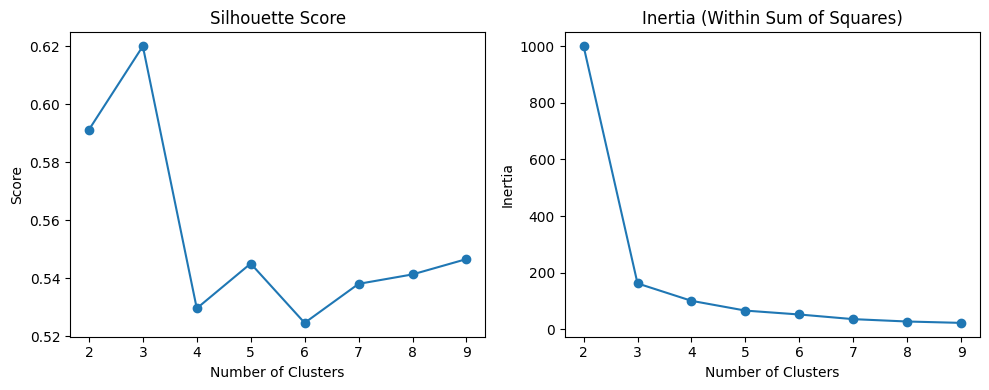

Best number of clusters (by silhouette): 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# STEP 1: Feature Engineering
df['RISK_SCORE'] = df['DOWNGRADE_VALUE_LOST_PERCENT'] / df['SHELF_LIFE_IN_MONTH']
df['TURNOVER_RATE'] = df['TOTAL_OUTBOUND_MT'] / (df['UNRESRICTED_STOCK'] + 1)
df['VALUE_PER_UNIT'] = df['STOCK_SELL_VALUE'] / (df['UNRESRICTED_STOCK'] + 1)

# STEP 2: เตรียมข้อมูลสำหรับ Clustering
features = [
    'RISK_SCORE',
    'TURNOVER_RATE',
    'VALUE_PER_UNIT'
]

X = df[features].dropna().copy()  # ลบค่า missing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: หา K ที่เหมาะสมด้วย Silhouette Score
silhouette_scores = []
inertias = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    inertias.append(kmeans.inertia_)

# STEP 5: วาดกราฟ Elbow & Silhouette
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(k_range, inertias, marker='o')
plt.title('Inertia (Within Sum of Squares)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# STEP 6: เลือกจำนวน Cluster ที่ดีที่สุด (หรือกำหนดเอง)
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (by silhouette): {best_k}")

# STEP 7: Fit Final KMeans และจัดกลุ่มสินค้า
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['CLUSTER'] = final_kmeans.fit_predict(X_scaled)



In [ ]:
# เลือกเฉพาะ feature + CLUSTER ที่ต้องการดู
cluster_summary = df.groupby('CLUSTER')[features].mean().round(2)

# แสดงผล
print(cluster_summary)


         RISK_SCORE  TURNOVER_RATE  VALUE_PER_UNIT
CLUSTER                                           
0              8.38           0.06         5791.78
1              3.04           0.03          771.61
2              1.00          98.95      2457206.00


In [ ]:
df = df.sort_values('STOCK_SELL_VALUE', ascending=False)
df['CUM_PERCENT'] = df['STOCK_SELL_VALUE'].cumsum() / df['STOCK_SELL_VALUE'].sum()

def classify_abc(p):
    if p <= 0.8:
        return 'A'
    elif p <= 0.95:
        return 'B'
    else:
        return 'C'

df['ABC_CLASS'] = df['CUM_PERCENT'].apply(classify_abc)


In [ ]:
# ตรวจสอบว่าคอลัมน์ ABC_CLASS และ CLUSTER ถูกเพิ่มใน df แล้ว
# df['ABC_CLASS'] = df['CUM_PERCENT'].apply(classify_abc)
# df['CLUSTER'] = final_kmeans.fit_predict(X_scaled) # จากโค้ด K-Means ก่อนหน้า

# ตรวจสอบการกระจายของ CLUSTER ภายในแต่ละ ABC_CLASS
print("Distribution of Clusters within each ABC Class:")
print(df.groupby('ABC_CLASS')['CLUSTER'].value_counts(normalize=True).unstack(fill_value=0))

# ดูค่าเฉลี่ยของ Features สำหรับแต่ละการ Combination (ABC_CLASS x CLUSTER)
print("\nMean Features by ABC Class and Cluster:")
combination_summary = df.groupby(['ABC_CLASS', 'CLUSTER'])[features].mean()
print(combination_summary)

# หรือดูเฉพาะจำนวนสินค้าในแต่ละ Combination
print("\nNumber of Materials by ABC Class and Cluster:")
print(df.groupby(['ABC_CLASS', 'CLUSTER']).size().unstack(fill_value=0))

Distribution of Clusters within each ABC Class:
CLUSTER           0         1         2
ABC_CLASS                              
A          0.500000  0.500000  0.000000
B          0.263158  0.736842  0.000000
C          0.287066  0.709779  0.003155

Mean Features by ABC Class and Cluster:
                   RISK_SCORE  TURNOVER_RATE  VALUE_PER_UNIT
ABC_CLASS CLUSTER                                           
A         0          8.157895       0.000317    1.265966e+01
          1          2.911341       0.000413    1.610514e+02
B         0          8.687500       0.000453    5.917189e+00
          1          2.829268       0.000343    7.202248e+01
C         0          8.352041       0.091192    8.270023e+03
          1          3.099624       0.037164    9.972812e+02
          2          1.000000      98.950000    2.457206e+06

Number of Materials by ABC Class and Cluster:
CLUSTER     0    1  2
ABC_CLASS            
A          19   19  0
B          20   56  0
C          91  225  1


In [ ]:
cluster = df[['MATERIAL_NAME', 'ABC_CLASS', 'CLUSTER']]

In [ ]:
cluster.to_csv('/content/cluster.csv', index=False)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

def forecast_sarima(df, date_col, value_col, material_col='MATERIAL_NAME', steps=6):
    df[date_col] = pd.to_datetime(df[date_col])
    results_list = []

    for material in df[material_col].unique():
        sub_df = df[df[material_col] == material].copy()
        sub_df.set_index(date_col, inplace=True)
        ts = sub_df.resample('MS')[value_col].sum().fillna(0)

        if len(ts) >= 12:
            try:
                model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
                results = model.fit(disp=False)
                forecast = results.get_forecast(steps=steps)
                for date, value in forecast.predicted_mean.items():
                    results_list.append({
                        'MATERIAL_NAME': material,
                        'FORECAST_DATE': date.strftime('%Y-%m-%d'),
                        'FORECAST_QUANTITY_MT': round(value, 2)
                    })
            except:
                continue
    return pd.DataFrame(results_list)

# Forecast Inbound
inbound_forecast_df = forecast_sarima(inbound, 'INBOUND_DATE', 'NET_QUANTITY_MT')

# Forecast Outbound
outbound_forecast_df = forecast_sarima(outbound, 'OUTBOUND_DATE', 'NET_QUANTITY_MT')

# Save to CSV
inbound_forecast_df.to_csv('/content/inbound_sarima_forecast.csv', index=False)
outbound_forecast_df.to_csv('/content/outbound_sarima_forecast.csv', index=False)


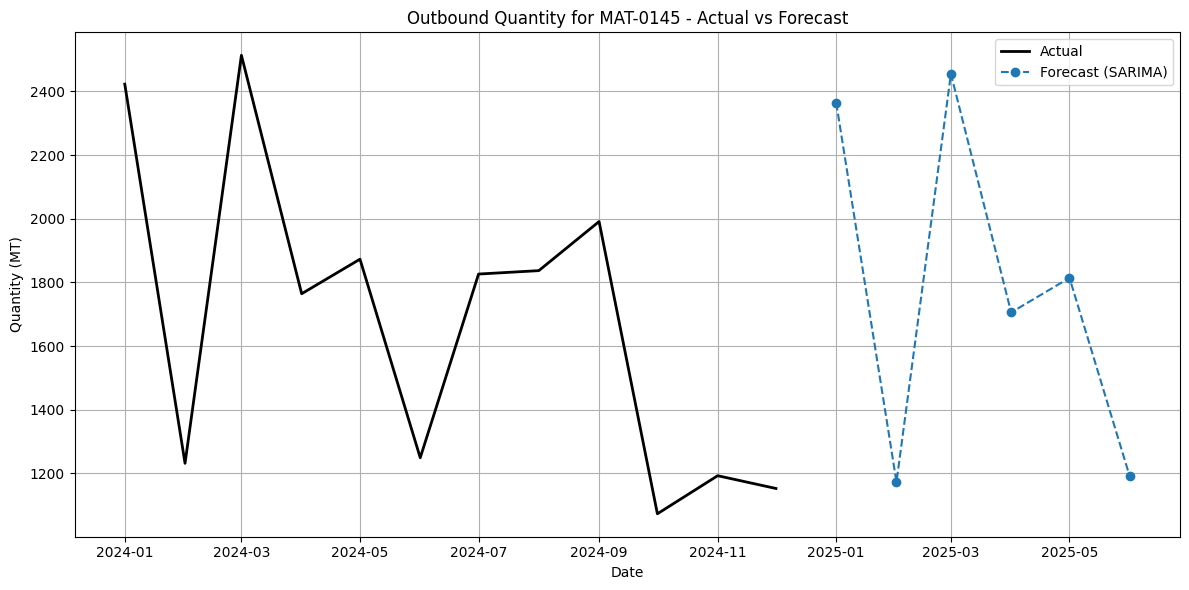

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_forecast(df_actual, df_forecast, material_name, date_col, value_col, label='Outbound'):
    # แปลงวันที่
    df_actual[date_col] = pd.to_datetime(df_actual[date_col])
    df_forecast['FORECAST_DATE'] = pd.to_datetime(df_forecast['FORECAST_DATE'])

    actual = df_actual[df_actual['MATERIAL_NAME'] == material_name].copy()
    forecast = df_forecast[df_forecast['MATERIAL_NAME'] == material_name].copy()

    actual_monthly = actual.set_index(date_col).resample('MS')[value_col].sum()

    plt.figure(figsize=(12,6))
    plt.plot(actual_monthly.index, actual_monthly.values, label='Actual', color='black', linewidth=2)
    plt.plot(forecast['FORECAST_DATE'], forecast['FORECAST_QUANTITY_MT'], label='Forecast (SARIMA)', marker='o', linestyle='--')

    plt.title(f'{label} Quantity for {material_name} - Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('Quantity (MT)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_forecast(
    df_actual=outbound,
    df_forecast=outbound_forecast_df,
    material_name='MAT-0145',
    date_col='OUTBOUND_DATE',
    value_col='NET_QUANTITY_MT',
    label='Outbound'
)
